Line 1: (0.335,0.0) (0.6791,1.0)
Line 2: (0.7081,0.0) (0.9096,1.0)


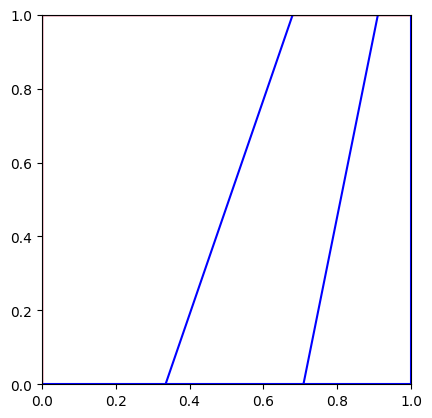

Vertex: (0.0,1.0)
Vertex: (0.6791,1.0)
Vertex: (0.0,0.0)
Vertex: (0.9096,1.0)
Vertex: (1.0,1.0)
Vertex: (0.335,0.0)
Vertex: (1.0,0.0)
Vertex: (0.7081,0.0)
(0.335,0.0) (0.6791,1.0)
(0.7081,0.0) (0.9096,1.0)
(0.0,0.0) (0.335,0.0)
(0.335,0.0) (0.7081,0.0)
(0.7081,0.0) (1.0,0.0)
(1.0,0.0) (1.0,1.0)
(0.0,1.0) (0.6791,1.0)
(0.6791,1.0) (0.9096,1.0)
(0.9096,1.0) (1.0,1.0)
(0.0,0.0) (0.0,1.0)


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

# Matplotlib setup
fig, ax = plt.subplots(1)
square = patches.Rectangle((0.0, 0.0), 1, 1, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(square)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')

# Vertex class
class Vertex:
    def __init__(self, x, y):
        self.x = float(x)
        self.y = float(y)
    def __eq__(self, other):
        return np.isclose(self.x, other.x) and np.isclose(self.y, other.y)
    def __hash__(self):
        return hash((round(self.x, 6), round(self.y, 6)))
    def __repr__(self):
        return f"Vertex({self.x:.4f}, {self.y:.4f})"
    def sub(self, other):
        self.x-=other.x
        self.y-=other.y
        return self
    def add(self, other):
        self.x+=other.x
        self.y+=other.y
        return self
    def mul(self, other):
        self.x*=other.x
        self.y*=other.y
        return self
    def div(self, other):
        self.x/=other.x
        self.y/=other.y
        return self
    

# Corners of the square
corners = [
    Vertex(0.0, 0.0),
    Vertex(1.0, 0.0),
    Vertex(1.0, 1.0),
    Vertex(0.0, 1.0)
]

digits = 4

class Line:
    def __init__(self, v1=None, v2=None, id=None):
        if v1 is not None and v2 is not None:
            self.v1 = v1
            self.v2 = v2
            self.id = id
            self.intersections = []         # List of intersection points (optional)
            self.intersected_lines = set()  # Set of Line objects or their IDs
        else:
            if random.randint(1, 10) % 2 == 0:
                y1 = np.round(random.random(), digits)
                y2 = np.round(random.random(), digits)
                self.v1 = Vertex(0, y1)
                self.v2 = Vertex(1, y2)
            else:
                x1 = np.round(random.random(), digits)
                x2 = np.round(random.random(), digits)
                self.v1 = Vertex(x1, 0)
                self.v2 = Vertex(x2, 1)
        self.x = [self.v1.x, self.v2.x]
        self.y = [self.v1.y, self.v2.y]
    def __str__(self):
        return f"({self.v1.x},{self.v1.y}) ({self.v2.x},{self.v2.y})"
    def as_tuple(self):
        return (self.v1, self.v2)
    def intersect(self, other):
        # Returns intersection point as Vertex if segments intersect, else None
        x1, y1 = self.v1.x, self.v1.y
        x2, y2 = self.v2.x, self.v2.y
        x3, y3 = other.v1.x, other.v1.y
        x4, y4 = other.v2.x, other.v2.y

        denom = (x1-x2)*(y3-y4) - (y1-y2)*(x3-x4)
        if np.isclose(denom, 0):
            return None  # Parallel lines

        px = ((x1*y2 - y1*x2)*(x3-x4) - (x1-x2)*(x3*y4 - y3*x4)) / denom
        py = ((x1*y2 - y1*x2)*(y3-y4) - (y1-y2)*(x3*y4 - y3*x4)) / denom

        # Check if intersection is within both segments
        def between(a, b, c):
            return min(a, b) - 1e-8 <= c <= max(a, b) + 1e-8

        if (between(x1, x2, px) and between(y1, y2, py) and
            between(x3, x4, px) and between(y3, y4, py)):
            return Vertex(np.round(px, digits), np.round(py, digits))
        return None

class Poly_Cycle:
    def __init__(self, set, start, end, closed, fine):
        self.Cycle_Set=set
        self.start_idx=start
        self.end_idx=end
        self.isClosed=closed
        self.fine=fine

PolyCycles=[]

class Polygon:
    def __init__(self):
        pass

class Polygon_Detector:
    def __init__(self):
        pass


def create_lines(n):
    lines = []
    for idx in range(n):
        line = Line()
        print(f"Line {idx+1}: {line}")
        lines.append(line)
    return lines

# Add random lines and border lines
lines = create_lines(2)
border_lines = [
    Line(corners[0], corners[1]),
    Line(corners[1], corners[2]),
    Line(corners[2], corners[3]),
    Line(corners[3], corners[0])
]
lines += border_lines

# Find all intersections
intersections = {i: set([lines[i].v1, lines[i].v2]) for i in range(len(lines))}
for i in range(len(lines)):
    for j in range(i+1, len(lines)):
        pt = lines[i].intersect(lines[j])
        if pt:
            intersections[i].add(pt)
            intersections[j].add(pt)

# Split lines at intersection points
def split_line_at_points(line, points):
    # Sort points along the line
    if abs(line.v1.x - line.v2.x) > abs(line.v1.y - line.v2.y):
        points = sorted(points, key=lambda v: v.x)
    else:
        points = sorted(points, key=lambda v: v.y)
    segments = []
    # Remove duplicate points (using set), then sort again
    unique_points = list(set(points))
    if abs(line.v1.x - line.v2.x) > abs(line.v1.y - line.v2.y):
        unique_points.sort(key=lambda v: v.x)
    else:
        unique_points.sort(key=lambda v: v.y)
    # Replace -0.0 with 0.0 for x and y
    for v in unique_points:
        if np.isclose(v.x, 0.0):
            v.x = 0.0
        if np.isclose(v.y, 0.0):
            v.y = 0.0
    for i in range(len(unique_points)-1):
        if unique_points[i] != unique_points[i+1]:
            seg = Line(unique_points[i], unique_points[i+1])
            segments.append(seg)
    return segments

new_lines = []
for idx, line in enumerate(lines):
    pts = list(intersections[idx])
    segments = split_line_at_points(line, pts)
    new_lines.extend(segments)

# Plot all segments
for line in new_lines:
    plt.plot(line.x, line.y, color='b')
plt.show()


# Print all vertices (optional)
all_vertices = set()
for line in new_lines:
    all_vertices.add(line.v1)
    all_vertices.add(line.v2)
for vertex in all_vertices:
    print(f"Vertex: ({vertex.x},{vertex.y})")

for line in new_lines:
    print(line)
    





# NEXT- 


https://stackoverflow.com/questions/375471/how-can-i-form-polygons-from-lines?rq=3

make intersections create new lines?

https://web.ist.utl.pt/alfredo.ferreira/publications/12EPCG-PolygonDetection.pdf

PAPER FOR THE ALGORITHM